R Drew Fergus<br>
Predictive_Modeling_and_Machine_Learning<br>


##  The Data<br>
    
The data used in this project comes from the UCI Machine Learning repository. It contains information relating to caesarian births and can be retrieved from: http://archive.ics.uci.edu/ml/datasets/Caesarian+Section+Classification+Dataset. The data set is small, containing only 80 observations but it is of higher quality as there do not appear to be entry errors or missing data.

##  The Questions<br>

During this project I wanted to discover if it was possible to answer several questions from the data. Those questions are of three distinct types: quantatative, qualatative and one question without a specific response type.

For the quantatative response I wanted to determine the probability or risk of having a C-section based on the other features in the data. The qualitative response involves predetermining if a birth is going to be done by C-section based on certain data features and threshold. The non specific response (unsupervised learning) was to cluster births to understand groups with the most and least amount of risk to need a birth by C-section.

## The Process<br>

The process for the quantative and qualatative questions were very similar and the general outline of how I approached them  can be found below. The unsupervised learning methods used for the question with no structured response were performed last. Other important notes on the process can be found in the below code as well.

*  Load Data
*  Summarize Data
*  Descriptive statistics
*  Data visualizations
*  Prepare Data
*  Spot Check Algorithms
*  Compare Algorithms & Tuning
*  Ensembles & Tuning
*  Finalize Model
*  Predictions on validation dataset
*  Create standalone model
*  PCA & KMeans Clustering


## Conclusions<br>

Overall, predictions can be made from the data, but not with a high degree of certainty. It is possible that more testing and algorithms could improve performance, but my reccomedations are below.

There was moderate success in the quantatative or regression task. After comparing and tuning, the most successful algorithm and ensemnble was the AdaBoost regressor.

The results from the qualatative or classification task were very close to those from the quantatative task. In this instance the most successful algorithm was the GaussianNB classifier. 

The results from the unsupervised task or task without a structured response showed that most of the variability in the data could not be accounted for by a small number of features. However, there was good success in clustering the observations from this data set into discrete groups.

### Take Away and Recomendations

Recommendations after completing this project are as follows:<br>

* More data. This data set was very small and while statistical inferences can be made on smaller samples, more data would be advantageous.

* More features or variables. Not only should we aquire a larger sample to study, but we should look for more variables dealing with caesarian births to see if there are additional and, possibly more important varibles that are not currently being tracked.

* Some additional ideas for variables are: ethnicity, insurance type, country, region, hospital, language spoken, history of caesarian birth, sex of doctor, weight, etc. 

In [1]:
# Load libraries
import numpy as np
from numpy import set_printoptions
from numpy import arange
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest,chi2, RFE
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, scale
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from scipy.io.arff import loadarff
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file = loadarff('C:\\Users\\Fergus Family\\Desktop\\School\\DATA SETS\\caesarian.csv.arff')
df = pd.DataFrame(file[0])

In [3]:
df= df.replace(r'\D', '').astype(int)

In [4]:
# df.to_csv('n_caesarian.csv')

In [5]:
# Load dataset
filename = 'C:\\Users\\Fergus Family\\Desktop\\School\\DATA SETS\\n_caesarian.csv'
names = ['Age', 'Delivery number', 'Delivery time', 'Blood of Pressure', 'Heart Problem', 'Caesarian']
dataset = read_csv(filename, names=names, header=0 )
dataset = dataset.astype(float)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 6 columns):
Age                  80 non-null float64
Delivery number      80 non-null float64
Delivery time        80 non-null float64
Blood of Pressure    80 non-null float64
Heart Problem        80 non-null float64
Caesarian            80 non-null float64
dtypes: float64(6)
memory usage: 4.4 KB


In [6]:
# descriptions
dataset.describe()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,27.687500,1.662500,0.637500,1.000000,0.375000,0.575000
std,5.017927,0.794662,0.815107,0.711568,0.487177,0.497462
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,0.000000,0.750000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,32.000000,2.000000,1.000000,1.250000,1.000000,1.000000
max,40.000000,4.000000,2.000000,2.000000,1.000000,1.000000


In [7]:
# shape
print(dataset.shape)

(80, 6)


In [8]:
# correlation
dataset.corr()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
Age,1.000000,0.427160,-0.021857,0.074448,0.250485,0.077966
Delivery number,0.427160,1.000000,-0.074017,0.134315,0.200267,0.144894
Delivery time,-0.021857,-0.074017,1.000000,-0.087298,-0.003985,-0.166233
Blood of Pressure,0.074448,0.134315,-0.087298,1.000000,0.036515,-0.035760
Heart Problem,0.250485,0.200267,-0.003985,0.036515,1.000000,0.352557
Caesarian,0.077966,0.144894,-0.166233,-0.035760,0.352557,1.000000


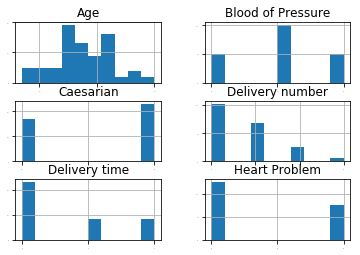

In [9]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

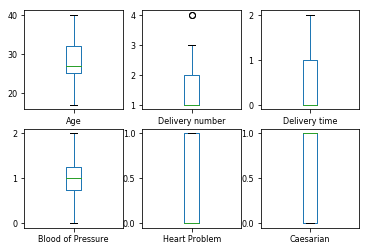

In [10]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False,
fontsize=8)
pyplot.show()

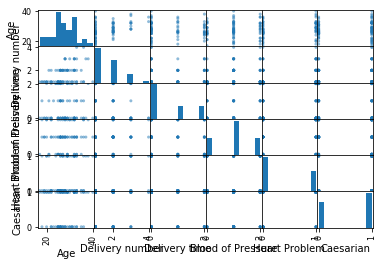

In [11]:
# pairplots
scatter_matrix(dataset)
pyplot.show()

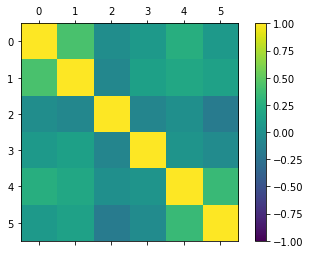

In [12]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

Because this data set had so few features I had intended to keep them all, but after considering this matrix and some of the other correlations I created another dataframe without the 'Deleivery time' variable.

In [13]:
# New Data set without 'Delivery time'
data2 = dataset.drop('Delivery time', axis=1)
names2 = ['Age', 'Delivery number', 'Blood of Pressure', 'Heart Problem', 'Caesarian']

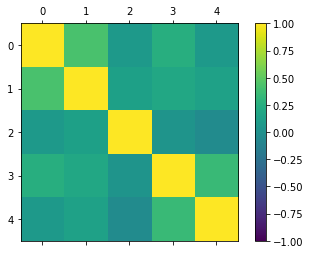

In [14]:
# NEW correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data2.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

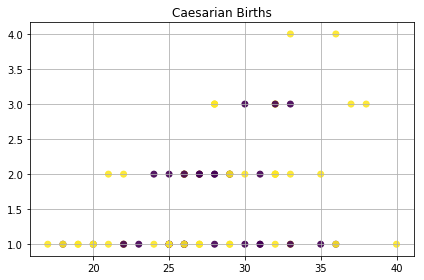

In [15]:
# Basic plot to visualize several features
a= data2['Age']
b= data2['Delivery number']
fig, ax = plt.subplots()
ax.scatter( a,b, c= data2['Caesarian'], alpha=0.9)

ax.set_title('Caesarian Births')

ax.grid(True)
fig.tight_layout()

plt.show()

In [16]:
# Split-out validation dataset
array = data2.values
X = array[:,0:4]
Y = array[:, 4:]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [17]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

I use Elastic Net for this project as it is something of a hybrid or 
compromise between Ridge regression and Lasso.

In [18]:
#Regression

In [19]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='auto')))

In [20]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.247969 (0.091670)
LASSO: -0.249012 (0.049387)
EN: -0.249012 (0.049387)
KNN: -0.344667 (0.118248)
CART: -0.472024 (0.126327)
SVR: -0.298000 (0.134138)


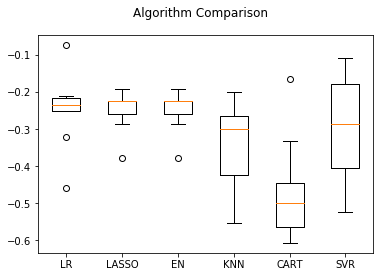

In [21]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [22]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.247969 (0.091670)
ScaledLASSO: -0.249012 (0.049387)
ScaledEN: -0.249012 (0.049387)
ScaledKNN: -0.306952 (0.083793)
ScaledCART: -0.443452 (0.160587)
ScaledSVR: -0.335462 (0.133105)


Loooking at the models Lasso and Elastic Net are identical. From here I optimize Elastic Net and, just to compare, I also optimised KNN.

In [23]:
# EN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {"max_iter": [15, 10, 25],"alpha": [ 0.01, 0.1, .5],"l1_ratio": np.arange(0.0, 1.0, 0.1)}
model = ElasticNet()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.232886 using {'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 15}
-0.243873 (0.090948) with: {'alpha': 0.01, 'l1_ratio': 0.0, 'max_iter': 15}
-0.243873 (0.090948) with: {'alpha': 0.01, 'l1_ratio': 0.0, 'max_iter': 10}
-0.243873 (0.090948) with: {'alpha': 0.01, 'l1_ratio': 0.0, 'max_iter': 25}
-0.243461 (0.090217) with: {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 15}
-0.243461 (0.090217) with: {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 10}
-0.243461 (0.090217) with: {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 25}
-0.243051 (0.089489) with: {'alpha': 0.01, 'l1_ratio': 0.2, 'max_iter': 15}
-0.243051 (0.089489) with: {'alpha': 0.01, 'l1_ratio': 0.2, 'max_iter': 10}
-0.243051 (0.089489) with: {'alpha': 0.01, 'l1_ratio': 0.2, 'max_iter': 25}
-0.242653 (0.088761) with: {'alpha': 0.01, 'l1_ratio': 0.30000000000000004, 'max_iter': 15}
-0.242653 (0.088761) with: {'alpha': 0.01, 'l1_ratio': 0.30000000000000004, 'max_iter': 10}
-0.242653 (0.088761) with: {'alpha': 0.01, 'l1_ratio': 0.30000

In [24]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.235651 using {'n_neighbors': 21}
-0.437500 (0.165359) with: {'n_neighbors': 1}
-0.366319 (0.104773) with: {'n_neighbors': 3}
-0.290000 (0.083684) with: {'n_neighbors': 5}
-0.271365 (0.080495) with: {'n_neighbors': 7}
-0.248071 (0.061435) with: {'n_neighbors': 9}
-0.238378 (0.072141) with: {'n_neighbors': 11}
-0.238998 (0.074447) with: {'n_neighbors': 13}
-0.242639 (0.071435) with: {'n_neighbors': 15}
-0.253785 (0.056137) with: {'n_neighbors': 17}
-0.243508 (0.042831) with: {'n_neighbors': 19}
-0.235651 (0.035193) with: {'n_neighbors': 21}


In [25]:
# Comparing Standardized models again with optimised EN and KNN
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet(max_iter=15,alpha= 0.1,l1_ratio=.5))])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor(n_neighbors=21))])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.247969 (0.091670)
ScaledLASSO: -0.249012 (0.049387)
ScaledEN: -0.234546 (0.067015)
ScaledKNN: -0.235952 (0.037329)
ScaledCART: -0.472024 (0.126327)
ScaledSVR: -0.335462 (0.133105)


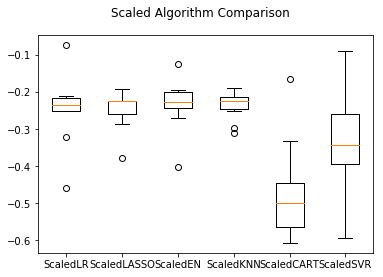

In [26]:
# Compare Algorithms; 
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The Elastic Net is the best performing model so far.

In [27]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor(n_estimators=75, learning_rate= 0.075, random_state=1))])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor(n_estimators=50))])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -0.286799 (0.106597)
ScaledGBM: -0.338067 (0.108039)
ScaledRF: -0.356840 (0.149354)
ScaledET: -0.378060 (0.119726)


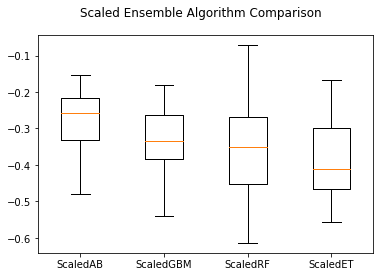

In [28]:
# Compare Ensemble Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [29]:
# Tune scaled AB
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators':[50,75,100],'learning_rate':[.01,0.05,.075,.1]}
model = AdaBoostRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring,cv=kfold,
iid=True)
grid_result = grid.fit(rescaledX, Y_train.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.313601 using {'learning_rate': 0.05, 'n_estimators': 50}
-0.324311 (0.099233) with: {'learning_rate': 0.01, 'n_estimators': 50}
-0.321909 (0.110830) with: {'learning_rate': 0.01, 'n_estimators': 75}
-0.328077 (0.121360) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.313601 (0.107924) with: {'learning_rate': 0.05, 'n_estimators': 50}
-0.318374 (0.114828) with: {'learning_rate': 0.05, 'n_estimators': 75}
-0.318858 (0.115656) with: {'learning_rate': 0.05, 'n_estimators': 100}
-0.324097 (0.101474) with: {'learning_rate': 0.075, 'n_estimators': 50}
-0.324283 (0.101210) with: {'learning_rate': 0.075, 'n_estimators': 75}
-0.324283 (0.101210) with: {'learning_rate': 0.075, 'n_estimators': 100}
-0.319446 (0.094076) with: {'learning_rate': 0.1, 'n_estimators': 50}
-0.320422 (0.094106) with: {'learning_rate': 0.1, 'n_estimators': 75}
-0.320422 (0.094106) with: {'learning_rate': 0.1, 'n_estimators': 100}


In [30]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = AdaBoostRegressor(n_estimators=75, learning_rate= 0.075, random_state=1)
model.fit(rescaledX, Y_train.ravel())

AdaBoostRegressor(base_estimator=None, learning_rate=0.075, loss='linear',
         n_estimators=75, random_state=1)

In [31]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

0.1859633301035857


AdaBoost was my most successful ensemble, but I also looked at Gradient Boosting with different Shrinkage values. Along with looking at the MSE I also checked feature importance.

In [32]:
# Boosting with different shrinkage values
shrinkage_values = [.001, .025, .005, .01, .025, .05, .1, .25, .5]
mses = []
for i in shrinkage_values:
    best = GradientBoostingRegressor(learning_rate=i, n_estimators=1000, random_state=1)
    best.fit(rescaledX, Y_train.ravel())
    mses.append(mean_squared_error(Y_validation, best.predict(rescaledValidationX)))

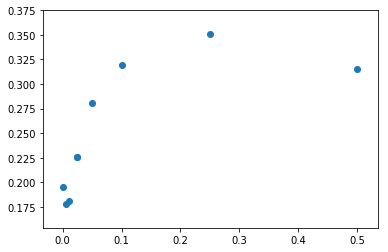

In [33]:
# Plot training set MSE for different shrinkage values
plt.scatter(shrinkage_values, mses)

In [34]:
# Get minimum test MSE value
print('Minimum test MSE:', np.min(mses))

Minimum test MSE: 0.17757641493841847


In [35]:
# Index of the shrinkage_value that leads to the minimum test MSE
np.where(mses == np.min(mses))

(array([2], dtype=int64),)

Text(0.5, 0, 'Variable importance')

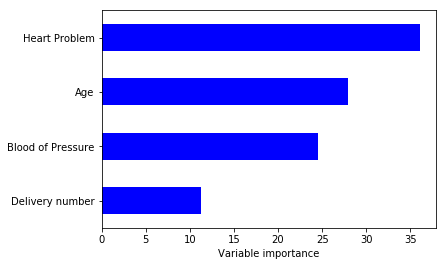

In [36]:
dataX = data2.iloc[:,0:4]
best = GradientBoostingRegressor(learning_rate=0.005)  # 0.005 is the learning_rate corresponding to the best test MSE
best.fit(rescaledX, Y_train.ravel())

feature_importance = best.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=dataX.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='b')
plt.xlabel('Variable importance')

In [37]:
#Classification

In [38]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.414286 (0.234787)
LDA: -0.483333 (0.243754)
KNN: -0.459524 (0.149849)
CART: -0.480952 (0.149754)
NB: -0.380952 (0.181952)
SVM: -0.409524 (0.168291)


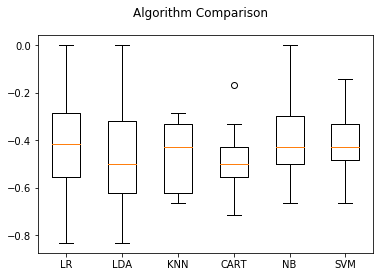

In [39]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [40]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM',
SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.466667 (0.247711)
ScaledLDA: -0.483333 (0.243754)
ScaledKNN: -0.500000 (0.114682)
ScaledCART: -0.480952 (0.196857)
ScaledNB: -0.380952 (0.181952)
ScaledSVM: -0.392857 (0.171114)


In [41]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold,
iid=True)
grid_result = grid.fit(rescaledX, Y_train.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.375000 using {'C': 0.5, 'kernel': 'rbf'}
-0.421875 (0.219572) with: {'C': 0.1, 'kernel': 'linear'}
-0.390625 (0.205797) with: {'C': 0.1, 'kernel': 'poly'}
-0.390625 (0.205797) with: {'C': 0.1, 'kernel': 'rbf'}
-0.390625 (0.205797) with: {'C': 0.1, 'kernel': 'sigmoid'}
-0.484375 (0.204437) with: {'C': 0.3, 'kernel': 'linear'}
-0.406250 (0.219387) with: {'C': 0.3, 'kernel': 'poly'}
-0.437500 (0.224520) with: {'C': 0.3, 'kernel': 'rbf'}
-0.390625 (0.205797) with: {'C': 0.3, 'kernel': 'sigmoid'}
-0.468750 (0.208965) with: {'C': 0.5, 'kernel': 'linear'}
-0.453125 (0.239430) with: {'C': 0.5, 'kernel': 'poly'}
-0.375000 (0.235439) with: {'C': 0.5, 'kernel': 'rbf'}
-0.468750 (0.215106) with: {'C': 0.5, 'kernel': 'sigmoid'}
-0.484375 (0.216801) with: {'C': 0.7, 'kernel': 'linear'}
-0.453125 (0.239430) with: {'C': 0.7, 'kernel': 'poly'}
-0.390625 (0.166864) with: {'C': 0.7, 'kernel': 'rbf'}
-0.500000 (0.229031) with: {'C': 0.7, 'kernel': 'sigmoid'}
-0.515625 (0.216801) with: {'C': 0.9, 

In [42]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM',
SVC(C=.5, kernel='rbf', gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.466667 (0.247711)
ScaledLDA: -0.483333 (0.243754)
ScaledKNN: -0.500000 (0.114682)
ScaledCART: -0.492857 (0.172039)
ScaledNB: -0.380952 (0.181952)
ScaledSVM: -0.383333 (0.236051)


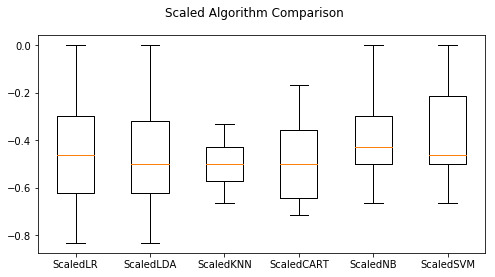

In [43]:
# Compare Algorithms
fig = pyplot.figure(figsize= (8,4))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [44]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: -0.500000 (0.108065)
GBM: -0.511905 (0.191145)
RF: -0.495238 (0.184059)
ET: -0.464286 (0.191145)


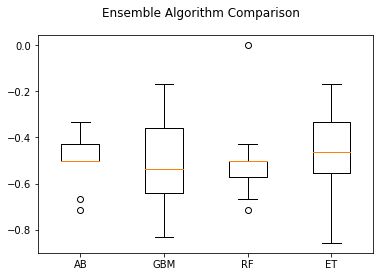

In [45]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

After comparing algorithms the Gaussian NB performed well, but the ensemble learners didn't do as well. In the end I used the GNB for the final model.

In [46]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GaussianNB()
model.fit(rescaledX, Y_train.ravel())
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8125
[[6 3]
 [0 7]]
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         9
         1.0       0.70      1.00      0.82         7

   micro avg       0.81      0.81      0.81        16
   macro avg       0.85      0.83      0.81        16
weighted avg       0.87      0.81      0.81        16



In [47]:
# Unsupervised

In [48]:
X6 = pd.DataFrame(scale(dataset), index=dataset.index, columns=dataset.columns)

In [49]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X6).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
pca_loadings

,V1,V2,V3,V4,V5,V6
Age,0.510329,0.360678,0.226698,-0.290634,0.349351,0.592933
Delivery number,0.527797,0.344348,0.045062,-0.268868,-0.523841,-0.504108
Delivery time,-0.171911,0.219208,0.780634,0.451454,-0.308251,0.119061
Blood of Pressure,0.164213,0.467475,-0.526446,0.675433,-0.050455,0.136379
Heart Problem,0.492312,-0.314384,0.231221,0.402300,0.512265,-0.425521
Caesarian,0.402622,-0.621219,-0.081114,0.146204,-0.493522,0.424810


In [50]:
# Fit the PCA model and transform X6 to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X6), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=X6.index)
df_plot

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.506993,0.754408,-1.740025,0.675275,0.389510,-0.318723
1,0.152973,-0.437972,-0.920689,-0.557793,-0.920597,0.185013
2,-0.873722,1.089312,0.207146,-0.296194,-0.302815,-0.527339
3,-0.892937,1.188397,-1.467250,0.325568,0.809869,0.394727
4,-0.256398,-0.727298,-1.102539,-0.324655,-1.200836,-0.290620
5,-1.774322,-0.007858,0.894590,-0.910923,0.431898,-0.081838
6,-0.559142,0.891015,-0.711141,-0.911832,0.147803,-0.555420
7,1.435398,0.432076,-0.590849,-1.247978,-1.163597,0.260094
8,-0.456800,0.963346,-0.665678,-0.970117,0.217863,-0.436512
9,-0.625290,-0.531073,0.031460,0.281753,-0.567736,1.089282


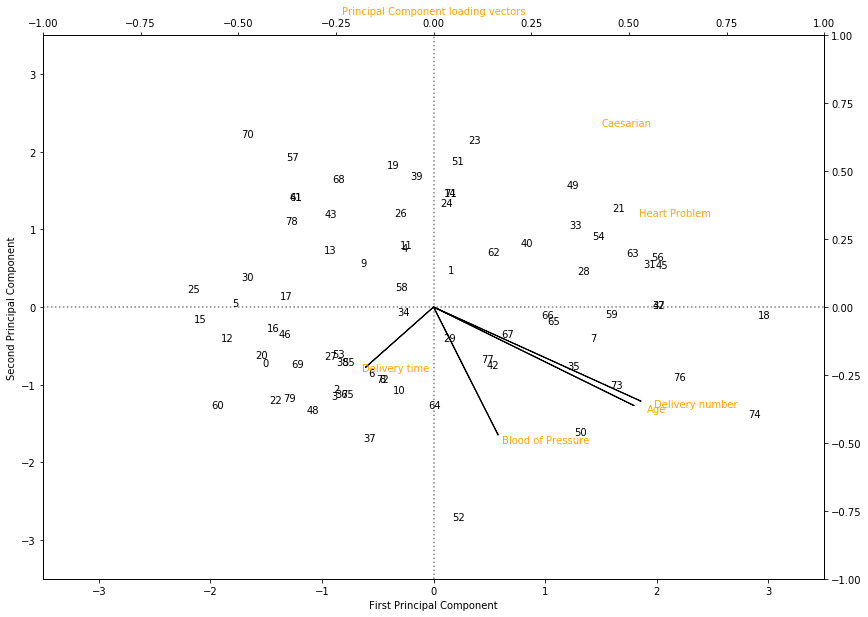

In [51]:
fig , ax1 = plt.subplots(figsize=(14,10))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);

In [52]:
# Standard deviation of the six principal components
np.sqrt(pca.explained_variance_)

array([1.34116991, 1.07369296, 1.03817995, 0.9387082 , 0.79566836,
       0.72960074])

In [53]:
pca.explained_variance_

array([1.79873673, 1.15281658, 1.0778176 , 0.88117308, 0.63308814,
       0.53231723])

In [54]:
pca.explained_variance_ratio_

array([0.29604209, 0.1897344 , 0.17739081, 0.1450264 , 0.10419576,
       0.08761054])

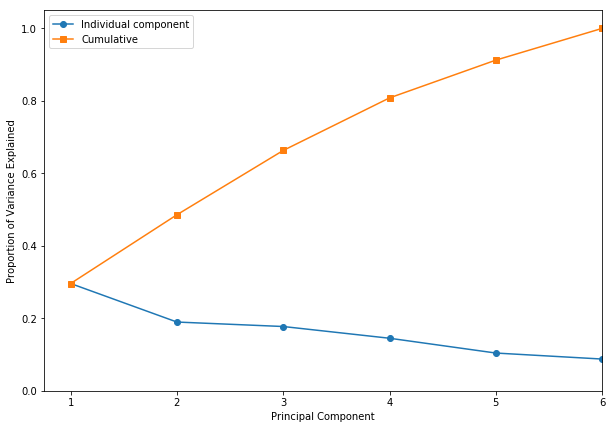

In [55]:
plt.figure(figsize=(10,7))

plt.plot([1,2,3,4,5,6], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6])
plt.legend(loc=2);

In [56]:
array7 = dataset.values
X7 = array7[:,:]

In [57]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X7)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
km1.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [59]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X7)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
pd.Series(km2.labels_).value_counts()

0    41
2    24
1    15
dtype: int64

In [61]:
km2.cluster_centers_

array([[26.92682927,  1.63414634,  0.75609756,  0.90243902,  0.31707317,
         0.48780488],
       [20.26666667,  1.13333333,  0.46666667,  1.13333333,  0.26666667,
         0.66666667],
       [33.625     ,  2.04166667,  0.54166667,  1.08333333,  0.54166667,
         0.66666667]])

In [62]:
km2.labels_

array([1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2,
       0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 2, 2,
       0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0])

In [63]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

462.6520325203252

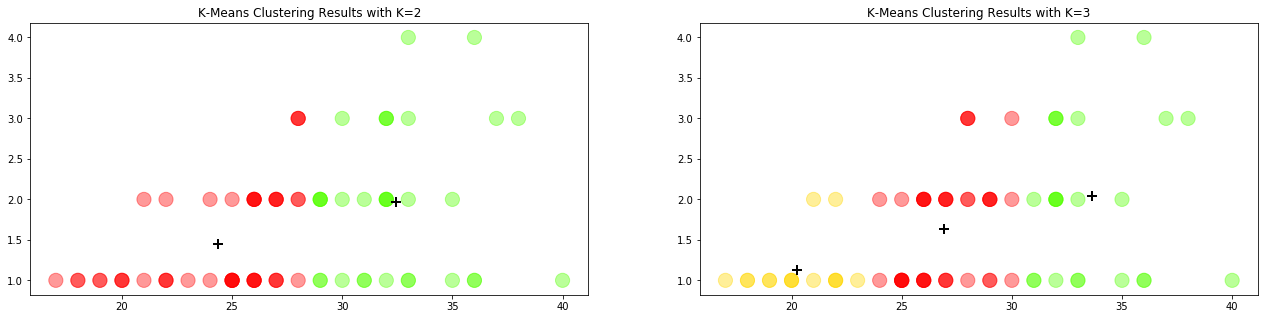

In [64]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(22,5))

ax1.scatter(X7[:,0], X7[:,1], s=200, c=km1.labels_, cmap=plt.cm.prism, alpha=.4) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X7[:,0], X7[:,1], s=200, c=km2.labels_, cmap=plt.cm.prism, alpha=.4) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

As an addition, I have included the clustered groups with one more graph. this one has 'Age' on the X axis and 'Caesarian' on the Y axis. This time I do not include their centroids.

Text(0.5, 1.0, 'K-Means Clustering Results with K=3')

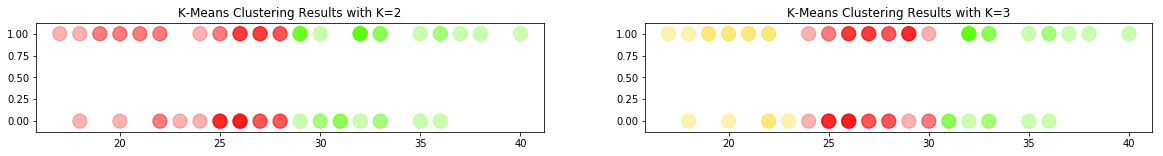

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,2))

ax1.scatter(X7[:,0], X7[:,5], s=200, c=km1.labels_, cmap=plt.cm.prism, alpha=.3) 
ax1.set_title('K-Means Clustering Results with K=2')


ax2.scatter(X7[:,0], X7[:,5], s=200, c=km2.labels_, cmap=plt.cm.prism, alpha=.3) 
ax2.set_title('K-Means Clustering Results with K=3')
